In [452]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [ ]:
result = pd.DataFrame()

for j in range(1 , 50):
    url = "https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=29f9f381-220c-4a7b-92da-7f8e7743ac2e&as-searchtext=laptop&page={}".format(j)
# header = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36"}

    webpage = requests.get(url).text
    soup = BeautifulSoup(webpage)
    laptops = soup.find_all('a' ,class_="_1fQZEK")

    review = []
    rating = []
    price = []
    per_off = []
    rs_off = []
    brand = []
    stars = []
    memory = []


    for i in laptops :
        try :
            brand.append(i.find('div' , class_="_4rR01T").text)

        except:
            brand.append(np.nan)

        try :
            stars.append(i.find('span' , class_="_1lRcqv").text)

        except :
            stars.append(np.nan)

        try :
            review.append(i.find('span' , class_="_2_R_DZ").text.split()[3])

        except :
            review.append(np.nan)

        try :
            rating.append(i.find('span' , class_="_2_R_DZ").text.split()[0])

        except :
            rating.append(np.nan)

        try :
            memory.append(i.find('div' , class_="fMghEO").text)

        except :
            memory.append(np.nan)

        try :

            price.append(i.find('div' , class_="_30jeq3 _1_WHN1").text)

        except :
            price.append(np.nan)

        try :

            rs_off.append(i.find('div' , class_="_3I9_wc _27UcVY").text)

        except :
            rs_off.append(np.nan)

        try :

            per_off.append(i.find('div' , class_="_3Ay6Sb").text)

        except :

            per_off.append(np.nan)






    d = {'brand':brand , 'stars':stars , 'review':review , 'rating':rating , 'memory':memory , 'price':price , 'rs_off':rs_off , 'per_off':per_off}

    df = pd.DataFrame(d)

    result = pd.concat([result , df] , ignore_index=True)


In [ ]:
result

In [2]:
df = pd.read_csv('/content/laptops.csv')

In [3]:
df

,brand,stars,review,rating,memory,price,rs_off,per_off
0,Lenovo IdeaPad 3 Chromebook Intel Celeron Dual...,3.5,237,"2,365",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,"₹18,900","₹25,710",26% off
1,Lenovo IdeaPad Slim 3 Chromebook Intel Celeron...,3.5,2,23,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,"₹22,999","₹34,890",34% off
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,4.7,"1,121","13,544",Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,"₹74,990","₹99,900",24% off
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,4.7,"1,121","13,544",Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,"₹69,990","₹99,900",29% off
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,4.2,345,"3,195",Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,"₹36,990","₹56,260",34% off
...,...,...,...,...,...,...,...,...
979,DELL G15-5530 Intel Core i5 13th Gen 13450HX -...,4.0,0,6,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,"₹79,890","₹1,02,317",21% off
980,HP Pavilion Aero (2023) AMD Ryzen 5 Hexa Core ...,4.3,26,219,AMD Ryzen 5 Hexa Core Processor16 GB LPDDR5 RA...,"₹64,391","₹80,314",19% off
981,HP Pavilion Aero (2023) AMD Ryzen 5 Hexa Core ...,4.3,26,219,AMD Ryzen 5 Hexa Core Processor16 GB LPDDR5 RA...,"₹64,391","₹80,314",19% off
982,MSI Vector GP78 Intel Core i9 13th Gen 13980HX...,NaN,NaN,NaN,Intel Core i9 Processor (13th Gen)32 GB DDR5 R...,"₹3,29,990","₹4,09,990",19% off


### Data cleaning

In [8]:
df['price'] = df['price'].str.split('₹').str.get(1).str.replace(',' , '').astype(int)

In [11]:
df['rs_off'] = df['rs_off'].str.split('₹').str.get(1).str.replace(',' , '')

In [13]:
df['rs_off'].isnull().sum()

4

In [16]:
df['per_off'] = df['per_off'].str.split('%').str.get(0)

In [18]:
df['stars'].isnull().sum()

94

In [21]:
df['review'] = df['review'].str.replace(',' , '')

In [23]:
df['rating'] = df['rating'].str.replace(',' , '')

In [35]:
x = df[df.duplicated()]
a = x.index

In [37]:
df.drop(a , inplace=True)


In [47]:
df.drop(index=3 , inplace=True)

In [48]:
df

,brand,stars,review,rating,memory,price,rs_off,per_off
0,Lenovo IdeaPad 3 Chromebook Intel Celeron Dual...,3.5,237,2365,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,18900,25710,26
1,Lenovo IdeaPad Slim 3 Chromebook Intel Celeron...,3.5,2,23,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,22999,34890,34
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,4.7,1121,13544,Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,74990,99900,24
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,4.2,345,3195,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,36990,56260,34
5,HP 2023 AMD Ryzen 3 Dual Core 3250U - (8 GB/51...,4.2,336,3878,AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAMWi...,28990,39995,27
...,...,...,...,...,...,...,...,...
975,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.1,6,51,Intel Core i5 Processor (13th Gen)8 GB DDR4 RA...,51990,70990,26
978,ASUS TUF Dash F15 Intel Core i7 12th Gen 12650...,4.5,22,216,Intel Core i7 Processor (12th Gen)16 GB DDR5 R...,88896,128900,31
979,DELL G15-5530 Intel Core i5 13th Gen 13450HX -...,4.0,0,6,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,79890,102317,21
982,MSI Vector GP78 Intel Core i9 13th Gen 13980HX...,NaN,NaN,NaN,Intel Core i9 Processor (13th Gen)32 GB DDR5 R...,329990,409990,19


,brand,stars,review,rating,memory,price,rs_off,per_off,processor


In [70]:
df['brand'].sample(15)

455    HP Pavilion AMD Ryzen 5 Hexa Core 5500U - (16 ...
652    ASUS ROG Zephyrus M16 (2022) with 90Whr Batter...
108    Infinix X2 Slim Intel Core i5 11th Gen 1155G7 ...
645    Lenovo LOQ Intel Core i5 12th Gen 12450H - (16...
363    Acer Nitro V Intel Core i5 13th Gen 13420H - (...
129    Lenovo Intel Celeron Dual Core 4th Gen - (8 GB...
469    ASUS X1502ZA Intel Core i3 12th Gen Intel Core...
942    HP Victus AMD Ryzen 5 Hexa Core 5600H - (8 GB/...
918    Acer AMD Ryzen 5 Quad Core - (8 GB/512 GB SSD/...
435    HP Pavilion x360 Intel Core i7 13th Gen - (16 ...
35     ASUS Vivobook S 14 Flip (2023) AMD Ryzen 5 Hex...
493    Lenovo Legion 5 Pro Intel Core i7 12th Gen 127...
143    Infinix Inbook Y1 Plus Intel Core i5 10th Gen ...
609    HP Pavilion Aero AMD Ryzen 5 Hexa Core 5600U -...
299    Acer Nitro V Intel Core i5 13th Gen 13420H - (...
Name: brand, dtype: object

In [55]:
df[df['brand'].str.contains('Intel')]

,brand,stars,review,rating,memory,price,rs_off,per_off
0,Lenovo IdeaPad 3 Chromebook Intel Celeron Dual...,3.5,237,2365,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,18900,25710,26
1,Lenovo IdeaPad Slim 3 Chromebook Intel Celeron...,3.5,2,23,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,22999,34890,34
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,4.2,345,3195,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,36990,56260,34
9,SAMSUNG Galaxy Book2 Pro EVO AMOLED Intel Core...,4.5,212,1413,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,62990,129990,51
10,CHUWI Intel Celeron Quad Core 12th Gen N100 - ...,3.7,7,40,Intel Celeron Quad Core Processor (12th Gen)8 ...,20990,34990,40
...,...,...,...,...,...,...,...,...
975,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.1,6,51,Intel Core i5 Processor (13th Gen)8 GB DDR4 RA...,51990,70990,26
978,ASUS TUF Dash F15 Intel Core i7 12th Gen 12650...,4.5,22,216,Intel Core i7 Processor (12th Gen)16 GB DDR5 R...,88896,128900,31
979,DELL G15-5530 Intel Core i5 13th Gen 13450HX -...,4.0,0,6,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,79890,102317,21
982,MSI Vector GP78 Intel Core i9 13th Gen 13980HX...,NaN,NaN,NaN,Intel Core i9 Processor (13th Gen)32 GB DDR5 R...,329990,409990,19


In [103]:
df['processor'] = np.nan

df.loc[df['brand'].str.contains('Intel' , case=False, regex=False) , 'processor'] = 'Intel'
df.loc[df['brand'].str.contains('AMD' , case=False, regex=False) , 'processor'] = 'AMD'
df.loc[df['brand'].str.contains('MacBook' , case=False, regex=False) , 'processor'] = 'MacBook'
df.loc[df['brand'].str.contains('MediaTek' , case=False, regex=False) , 'processor'] = 'MediaTek'
df.loc[df['brand'].str.contains('Ryzen' , case=False, regex=False) , 'processor'] = 'AMD'




In [133]:
df['core'] = np.nan

df.loc[df['brand'].str.contains('i3' , case=False, regex=False) , 'core'] = 'i3'
df.loc[df['brand'].str.contains('i2' , case=False, regex=False) , 'core'] = 'i2'
df.loc[df['brand'].str.contains('i4' , case=False, regex=False) , 'core'] = 'i4'
df.loc[df['brand'].str.contains('i5' , case=False, regex=False) , 'core'] = 'i5'
df.loc[df['brand'].str.contains('i6' , case=False, regex=False) , 'core'] = 'i6'
df.loc[df['brand'].str.contains('i7' , case=False, regex=False) , 'core'] = 'i7'
df.loc[df['brand'].str.contains('9 Octa' , case=False, regex=False) , 'core'] = '9'
df.loc[df['brand'].str.contains('Dual' , case=False, regex=False) , 'core'] = '2'
df.loc[df['brand'].str.contains('7 Octa' , case=False, regex=False) , 'core'] = '7'
df.loc[df['brand'].str.contains('5 Octa' , case=False, regex=False) , 'core'] = '5'
df.loc[df['brand'].str.contains('3 Octa' , case=False, regex=False) , 'core'] = '9'
df.loc[df['brand'].str.contains('M1' , case=False, regex=False) , 'core'] = ' M1'
df.loc[df['brand'].str.contains('5 Hexa' , case=False, regex=False) , 'core'] = 'Hexa Core'
df.loc[df['brand'].str.contains('Quad' , case=False, regex=False) , 'core'] = 'Quad'
df.loc[df['brand'].str.contains('Celeron Quad' , case=False, regex=False) , 'core'] = 'Celeron Quad'
df.loc[df['brand'].str.contains('i9' , case=False, regex=False) , 'core'] = 'i9'
# df.loc[df['brand'].str.contains('5 Quad' , case=False, regex=False) , 'core'] = '5 Quad'
df.loc[df['brand'].str.contains('M2' , case=False, regex=False) , 'core'] = 'M2'
df.loc[df['brand'].str.contains('M3' , case=False, regex=False) , 'core'] = 'M3'
df.loc[df['brand'].str.contains('Evo Intel' , case=False, regex=False) , 'core'] = 'Evo Intel'
df.loc[df['brand'].str.contains('3 Hexa' , case=False, regex=False) , 'core'] = 'Hexa Core'
# df.loc[df['brand'].str.contains(' ' , case=False, regex=False) , 'core'] = '5 Hexa'

df.loc[df['brand'].str.contains('HexaCore' , case=False, regex=False) , 'core'] = 'HexaCore'
df.loc[df['brand'].str.contains('Intel Core Ultra 7' , case=False, regex=False) , 'core'] = 'Intel Core'
df.loc[df['brand'].str.contains('Intel Core Ultra 5' , case=False, regex=False) , 'core'] = 'Intel Core'
# df.loc[df['brand'].str.contains('Ryzen 5' , case=False, regex=False) , 'core'] = 'Ryzen 5'










In [134]:
df[df['core'].isnull()]

,brand,stars,review,rating,memory,price,rs_off,per_off,processor,core,gen
294,Lenovo Ideapad Slim 3 MediaTek Kompanio 520 - ...,4.0,5,41,MediaTek Kompanio 520 Processor8 GB LPDDR4X RA...,17990,30790,41,MediaTek,NaN,NaN
674,ASUS AMD Ryzen 5 - (16 GB/512 GB SSD/Windows 1...,NaN,NaN,NaN,AMD Ryzen 5 Processor16 GB DDR4 RAMWindows 11 ...,57990,80990,28,AMD,NaN,NaN
723,ASUS AMD Ryzen 5 - (16 GB/512 GB SSD/Windows 1...,4.7,0,3,AMD Ryzen 5 Processor16 GB DDR4 RAMWindows 11 ...,68990,99500,30,AMD,NaN,NaN
883,ASUS VivoBook 14 Intel Pentium Silver N6000 - ...,4.1,37,310,Intel Pentium Silver Processor4 GB DDR4 RAM64 ...,27500,38990,29,Intel,NaN,NaN
908,Primebook S Wifi MediaTek MT8183 - (4 GB/128 G...,4.2,259,897,MediaTek MT8183 Processor4 GB LPDDR4 RAMAndroi...,12990,20990,38,MediaTek,NaN,NaN
945,Primebook 4G Android Based MediaTek MT8788 - (...,4.2,529,1822,MediaTek MT8788 Processor4 GB LPDDR4 RAMPrime ...,14990,27990,46,MediaTek,NaN,NaN


In [92]:
df.drop(columns=['core'] , inplace=True)

In [ ]:
df[df['brand'].str.contains('IdeaPad')]

In [88]:
df['core'].loc[493]

'9'

In [87]:
df['brand'].loc[493]

'Lenovo Legion 5 Pro Intel Core i7 12th Gen 12700H - (32 GB/1 TB SSD/Windows 11 Home/8 GB Graphics/NVID...'

In [149]:
df['gen'] = np.nan

df.loc[df['brand'].str.contains('10th' , case=False, regex=False) , 'gen'] = '10'
df.loc[df['brand'].str.contains('11th' , case=False, regex=False) , 'gen'] = '11'
df.loc[df['brand'].str.contains('12th' , case=False, regex=False) , 'gen'] = '12'
df.loc[df['brand'].str.contains('13th' , case=False, regex=False) , 'gen'] = '13'
df.loc[df['brand'].str.contains('14th' , case=False, regex=False) , 'gen'] = '14'
df.loc[df['brand'].str.contains('15th' , case=False, regex=False) , 'gen'] = '15'
df.loc[df['brand'].str.contains('9th' , case=False, regex=False) , 'gen'] = '9'
df.loc[df['brand'].str.contains('8th' , case=False, regex=False) , 'gen'] = '8'
df.loc[df['brand'].str.contains('7th' , case=False, regex=False) , 'gen'] = '7'
df.loc[df['brand'].str.contains('6th' , case=False, regex=False) , 'gen'] = '6'
df.loc[df['brand'].str.contains('4th' , case=False, regex=False) , 'gen'] = '4'
df.loc[df['brand'].str.contains('5th' , case=False, regex=False) , 'gen'] = '5'
df.loc[df['brand'].str.contains('Ultra 7' , case=False, regex=False) , 'gen'] = '7'
df.loc[df['brand'].str.contains('Ultra 5' , case=False, regex=False) , 'gen'] = '5'
df.loc[df['brand'].str.contains('Ultra 3' , case=False, regex=False) , 'gen'] = '3'
df.loc[df['brand'].str.contains('Ultra 4' , case=False, regex=False) , 'gen'] = '4'
df.loc[df['brand'].str.contains('Ultra 2' , case=False, regex=False) , 'gen'] = '2'
df.loc[df['brand'].str.contains('Ryzen 5' , case=False, regex=False) , 'gen'] = '5'
df.loc[df['brand'].str.contains('Ryzen 6' , case=False, regex=False) , 'gen'] = '6'
df.loc[df['brand'].str.contains('Ryzen 3' , case=False, regex=False) , 'gen'] = '3'
df.loc[df['brand'].str.contains('Ryzen 2' , case=False, regex=False) , 'gen'] = '2'
df.loc[df['brand'].str.contains('Ryzen 7' , case=False, regex=False) , 'gen'] = '7'
df.loc[df['brand'].str.contains('Ryzen 8' , case=False, regex=False) , 'gen'] = '8'
df.loc[df['brand'].str.contains('Ryzen 9' , case=False, regex=False) , 'gen'] = '9'





In [156]:
df[df['gen'].isnull()]

,brand,stars,review,rating,memory,price,rs_off,per_off,processor,core,gen
0,Lenovo IdeaPad 3 Chromebook Intel Celeron Dual...,3.5,237,2365,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,18900,25710,26,Intel,2,NaN
1,Lenovo IdeaPad Slim 3 Chromebook Intel Celeron...,3.5,2,23,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,22999,34890,34,Intel,2,NaN
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,4.7,1121,13544,Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,74990,99900,24,MacBook,M1,NaN
12,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,4.7,1121,13544,Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,74990,99900,24,MacBook,M1,NaN
31,Lenovo IdeaPad Slim 3 Chromebook Intel Celeron...,3.5,2,23,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,17990,34900,48,Intel,2,NaN
38,ASUS Vivobook Go 15 Intel Celeron Dual Core N4...,4.0,151,1401,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,19990,33990,41,Intel,2,NaN
50,Lenovo IdeaPad 3 Chromebook Intel Celeron Dual...,3.5,237,2365,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,16999,25710,33,Intel,2,NaN
68,Acer Extensa Intel Core i3 N305 - (8 GB/256 GB...,4.1,66,599,Intel Core i3 Processor8 GB LPDDR5 RAM64 bit W...,28990,49990,42,Intel,i3,NaN
73,ASUS Vivobook Go 15 Intel Celeron Dual Core N4...,4.0,151,1401,Intel Celeron Dual Core Processor8 GB DDR4 RAM...,24990,36990,32,Intel,2,NaN
83,HP 255 G9 AMD Athlon Dual Core AMD Athlon Silv...,3.9,96,1044,AMD Athlon Dual Core Processor4 GB DDR4 RAMDOS...,19979,27063,26,AMD,2,NaN


In [165]:
df['memory'].loc[883]

'Intel Pentium Silver Processor4 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 Inch) Display1 Year onsite warranty'

In [170]:
df[df['memory'].str.contains('Windows 11')]

,brand,stars,review,rating,memory,price,rs_off,per_off,processor,core,gen
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,4.2,345,3195,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,36990,56260,34,Intel,i3,12
5,HP 2023 AMD Ryzen 3 Dual Core 3250U - (8 GB/51...,4.2,336,3878,AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAMWi...,28990,39995,27,AMD,2,3
6,MSI Modern 14 AMD Ryzen 5 Hexa Core 7530U - (1...,4.3,143,1064,AMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAMW...,34990,64990,46,AMD,Hexa Core,5
7,MSI Bravo 15 AMD Ryzen 5 Hexa Core 7535HS - (8...,4.1,15,68,AMD Ryzen 5 Hexa Core Processor8 GB DDR5 RAMWi...,45990,67990,32,AMD,Hexa Core,5
8,Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...,4.2,22,124,AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,25990,39157,33,AMD,Quad,3
...,...,...,...,...,...,...,...,...,...,...,...
975,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.1,6,51,Intel Core i5 Processor (13th Gen)8 GB DDR4 RA...,51990,70990,26,Intel,i5,13
978,ASUS TUF Dash F15 Intel Core i7 12th Gen 12650...,4.5,22,216,Intel Core i7 Processor (12th Gen)16 GB DDR5 R...,88896,128900,31,Intel,i7,12
979,DELL G15-5530 Intel Core i5 13th Gen 13450HX -...,4.0,0,6,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,79890,102317,21,Intel,i5,13
982,MSI Vector GP78 Intel Core i9 13th Gen 13980HX...,NaN,NaN,NaN,Intel Core i9 Processor (13th Gen)32 GB DDR5 R...,329990,409990,19,Intel,i9,13


In [172]:
df['window'] = np.nan

df.loc[df['memory'].str.contains('Windows 11' , case=False, regex=False) , 'Window'] = '11'
df.loc[df['memory'].str.contains('Windows 10' , case=False, regex=False) , 'Window'] = '10'
df.loc[df['memory'].str.contains('Windows 9' , case=False, regex=False) , 'Window'] = '19'


In [173]:
df

,brand,stars,review,rating,memory,price,rs_off,per_off,processor,core,gen,window,Window
0,Lenovo IdeaPad 3 Chromebook Intel Celeron Dual...,3.5,237,2365,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,18900,25710,26,Intel,2,NaN,NaN,NaN
1,Lenovo IdeaPad Slim 3 Chromebook Intel Celeron...,3.5,2,23,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,22999,34890,34,Intel,2,NaN,NaN,NaN
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,4.7,1121,13544,Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,74990,99900,24,MacBook,M1,NaN,NaN,NaN
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,4.2,345,3195,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,36990,56260,34,Intel,i3,12,NaN,11
5,HP 2023 AMD Ryzen 3 Dual Core 3250U - (8 GB/51...,4.2,336,3878,AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAMWi...,28990,39995,27,AMD,2,3,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.1,6,51,Intel Core i5 Processor (13th Gen)8 GB DDR4 RA...,51990,70990,26,Intel,i5,13,NaN,11
978,ASUS TUF Dash F15 Intel Core i7 12th Gen 12650...,4.5,22,216,Intel Core i7 Processor (12th Gen)16 GB DDR5 R...,88896,128900,31,Intel,i7,12,NaN,11
979,DELL G15-5530 Intel Core i5 13th Gen 13450HX -...,4.0,0,6,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,79890,102317,21,Intel,i5,13,NaN,11
982,MSI Vector GP78 Intel Core i9 13th Gen 13980HX...,NaN,NaN,NaN,Intel Core i9 Processor (13th Gen)32 GB DDR5 R...,329990,409990,19,Intel,i9,13,NaN,11


In [248]:
df['ram'] = np.nan

df.loc[df['memory'].str.contains('8 GB DDR' , case=False, regex=False) , 'ram'] = '8'
df.loc[df['memory'].str.contains('16 GB DDR' , case=False, regex=False) , 'ram'] = '16'
df.loc[df['memory'].str.contains('32 GB DDR' , case=False, regex=False) , 'ram'] = '32'
df.loc[df['memory'].str.contains('64 GB DDR' , case=False, regex=False) , 'ram'] = '64'
df.loc[df['memory'].str.contains('256 GB DDR' , case=False, regex=False) , 'ram'] = '256'
df.loc[df['memory'].str.contains('512 GB DDR' , case=False, regex=False) , 'ram'] = '512'
df.loc[df['memory'].str.contains('16 GB DDR' , case=False, regex=False) , 'ram'] = '16'
df.loc[df['memory'].str.contains('12 GB DDR' , case=False, regex=False) , 'ram'] = '12'
df.loc[df['memory'].str.contains('4 GB DDR' , case=False, regex=False) , 'ram'] = '4'
df.loc[df['memory'].str.contains('6 GB DDR' , case=False, regex=False) , 'ram'] = '6'
df.loc[df['memory'].str.contains('2 GB DDR' , case=False, regex=False) , 'ram'] = '2'
# df.loc[df['memory'].str.contains('1 GB DDR' , case=False, regex=False) , 'ram'] = '1'
# df.loc[df['memory'].str.contains('3 GB DDR' , case=False, regex=False) , 'ram'] = '3'
df.loc[df['memory'].str.contains(' LPDDR4 12GB RAM' , case=False, regex=False) , 'ram'] = '12'


df.loc[df['memory'].str.contains('Processor4' , case=False, regex=False) , 'ram'] = '4'
df.loc[df['memory'].str.contains('Processor32' , case=False, regex=False) , 'ram'] = '32'
df.loc[df['memory'].str.contains('Processor8' , case=False, regex=False) , 'ram'] = '8'
df.loc[df['memory'].str.contains('Processor512' , case=False, regex=False) , 'ram'] = '512'
df.loc[df['memory'].str.contains('Processor16' , case=False, regex=False) , 'ram'] = '16'
df.loc[df['memory'].str.contains('Processor64' , case=False, regex=False) , 'ram'] = '64'
df.loc[df['memory'].str.contains('Processor6' , case=False, regex=False) , 'ram'] = '6'
df.loc[df['memory'].str.contains('Processor4' , case=False, regex=False) , 'ram'] = '4'
df.loc[df['memory'].str.contains('Processor18' , case=False, regex=False) , 'ram'] = '18'


df.loc[df['memory'].str.contains(')4' , case=False, regex=False) , 'ram'] = '4'
df.loc[df['memory'].str.contains(')8' , case=False, regex=False) , 'ram'] = '8'
df.loc[df['memory'].str.contains(')6' , case=False, regex=False) , 'ram'] = '6'
df.loc[df['memory'].str.contains(')16' , case=False, regex=False) , 'ram'] = '16'
df.loc[df['memory'].str.contains(')32' , case=False, regex=False) , 'ram'] = '32'
df.loc[df['memory'].str.contains(')512' , case=False, regex=False) , 'ram'] = '512'
df.loc[df['memory'].str.contains(')256' , case=False, regex=False) , 'ram'] = '256'
df.loc[df['memory'].str.contains(')2' , case=False, regex=False) , 'ram'] = '2'




# 12	16	64	128	256	512

In [270]:
df['rom'] = np.nan

df.loc[df['memory'].str.contains('m512 GB' , case=False, regex=False) , 'rom'] = '512'
df.loc[df['memory'].str.contains('m12 GB' , case=False, regex=False) , 'rom'] = '12'
df.loc[df['memory'].str.contains('m16 GB' , case=False, regex=False) , 'rom'] = '16'
df.loc[df['memory'].str.contains('m32 GB' , case=False, regex=False) , 'rom'] = '32'
df.loc[df['memory'].str.contains('m1 TB' , case=False, regex=False) , 'rom'] = '1000'
df.loc[df['memory'].str.contains('m256' , case=False, regex=False) , 'rom'] = '256'
df.loc[df['memory'].str.contains('m2 TB' , case=False, regex=False) , 'rom'] = '2000'



In [271]:
df[df['rom'].isnull()]

,brand,stars,review,rating,memory,price,rs_off,per_off,processor,core,gen,Window,ram,system,rom
0,Lenovo IdeaPad 3 Chromebook Intel Celeron Dual...,3.5,237,2365,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,18900,25710,26,Intel,2,NaN,NaN,4,os,NaN
1,Lenovo IdeaPad Slim 3 Chromebook Intel Celeron...,3.5,2,23,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,22999,34890,34,Intel,2,NaN,NaN,4,os,NaN
16,CHUWI Intel Celeron Dual Core 10th Gen N4020 -...,3.6,6,33,Fan-less Design\n(Low Power Consumption)4x fas...,14990,34990,57,Intel,2,10,11,4,os,NaN
31,Lenovo IdeaPad Slim 3 Chromebook Intel Celeron...,3.5,2,23,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,17990,34900,48,Intel,2,NaN,NaN,4,os,NaN
50,Lenovo IdeaPad 3 Chromebook Intel Celeron Dual...,3.5,237,2365,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,16999,25710,33,Intel,2,NaN,NaN,4,os,NaN
138,ASUS Chromebook Intel Celeron Dual Core N4500 ...,3.8,102,908,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,15990,32990,51,Intel,2,NaN,NaN,4,os,NaN
149,HP 360 Intel Celeron Quad Core N4120 - (4 GB/6...,4.0,77,861,Intel Celeron Quad Core Processor4 GB LPDDR4 R...,19990,31156,35,Intel,Celeron Quad,NaN,NaN,4,os,NaN
183,ASUS Chromebook Plus (2023) Intel Core i3 12th...,NaN,NaN,NaN,Intel Core i3 Processor (12th Gen)8 GB LPDDR5 ...,34990,55990,37,Intel,i3,12,NaN,8,os,NaN
223,Infinix Y1 Plus Neo (2023) Intel Celeron Quad ...,4.1,171,1177,Intel Celeron Quad Core Processor (11th Gen)4 ...,18990,29990,36,Intel,Celeron Quad,11,11,4,os,NaN
294,Lenovo Ideapad Slim 3 MediaTek Kompanio 520 - ...,4.0,5,41,MediaTek Kompanio 520 Processor8 GB LPDDR4X RA...,17990,30790,41,MediaTek,NaN,NaN,NaN,8,os,NaN


In [276]:
df['memory'].loc[138]

'Intel Celeron Dual Core Processor4 GB LPDDR4X RAMChrome Operating System39.62 cm (15.6 Inch) Display1 Year Onsite Warranty'

In [249]:
df[df['memory'].str.contains('2 GB DDR')]

,brand,stars,review,rating,memory,price,rs_off,per_off,processor,core,gen,window,Window,ram
275,ASUS ROG Strix Scar 15 (2022) Intel Core i9 12...,4.7,1,10,Intel Core i9 Processor (12th Gen)32 GB DDR5 R...,192999,278999,30,Intel,i9,12,NaN,11,32
493,Lenovo Legion 5 Pro Intel Core i7 12th Gen 127...,2.8,0,4,Intel Core i7 Processor (12th Gen)32 GB DDR5 R...,144990,279890,48,Intel,i7,12,NaN,11,32
589,HP Spectre x360 (2023) OLED Eyesafe Evo Intel ...,NaN,NaN,NaN,Intel Core i7 Processor (13th Gen)32 GB DDR4 R...,185990,213582,12,Intel,Evo Intel,13,NaN,11,32
643,ASUS Intel Core i9 14th Gen 14900HX - (32 GB/2...,NaN,NaN,NaN,Intel Core i9 Processor (14th Gen)32 GB DDR5 R...,329990,395990,16,Intel,i9,4,NaN,11,32
735,Lenovo Thinkpad P15s Gen 2 Mobile Workstation ...,NaN,NaN,NaN,Intel Core i7 Processor (11th Gen)32 GB DDR4 R...,153700,175666,12,Intel,i7,11,NaN,10,32
754,MSI Stealth 16 Studio Intel Core i7 13th Gen 1...,NaN,NaN,NaN,Intel Core i7 Processor (13th Gen)32 GB DDR5 R...,229990,335990,31,Intel,i7,13,NaN,11,32
825,ASUS ROG Zephyrus Duo 16 (2022) Dual Screen La...,NaN,NaN,NaN,AMD Ryzen 9 Octa Core Processor32 GB DDR5 RAM6...,361990,431990,16,AMD,2,9,NaN,11,32
915,HP Omen Intel Core i7 12th Gen 12800HX - (32 G...,NaN,NaN,NaN,Intel Core i7 Processor (12th Gen)32 GB DDR5 R...,209999,245000,14,Intel,i7,12,NaN,11,32
982,MSI Vector GP78 Intel Core i9 13th Gen 13980HX...,NaN,NaN,NaN,Intel Core i9 Processor (13th Gen)32 GB DDR5 R...,329990,409990,19,Intel,i9,13,NaN,11,32


In [266]:
df['memory'].loc[493]

'Intel Core i7 Processor (12th Gen)32 GB DDR5 RAMWindows 11 Operating System1 TB SSD40.64 cm (16 Inch) Display3 Years Onsite Warranty + 1 Year Accidental Damage Protection + 3 Years Legion Ultimate Support'

In [254]:
df['system'] = np.nan

df.loc[df['memory'].str.contains('Operating System' , case=False, regex=False) , 'system'] = 'os'
df.loc[df['memory'].str.contains('OS' , case=False, regex=False) , 'system'] = 'os'
df.loc[df['memory'].str.contains('MacOS' , case=False, regex=False) , 'system'] = 'macos'


In [280]:
df['brand'] = df['brand'].str.split().str.get(0)

In [281]:
df

,brand,stars,review,rating,memory,price,rs_off,per_off,processor,core,gen,Window,ram,system,rom
0,Lenovo,3.5,237,2365,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,18900,25710,26,Intel,2,NaN,NaN,4,os,NaN
1,Lenovo,3.5,2,23,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,22999,34890,34,Intel,2,NaN,NaN,4,os,NaN
2,Apple,4.7,1121,13544,Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,74990,99900,24,MacBook,M1,NaN,NaN,8,os,256
4,HP,4.2,345,3195,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,36990,56260,34,Intel,i3,12,11,8,os,512
5,HP,4.2,336,3878,AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAMWi...,28990,39995,27,AMD,2,3,11,8,os,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,MSI,4.1,6,51,Intel Core i5 Processor (13th Gen)8 GB DDR4 RA...,51990,70990,26,Intel,i5,13,11,8,os,512
978,ASUS,4.5,22,216,Intel Core i7 Processor (12th Gen)16 GB DDR5 R...,88896,128900,31,Intel,i7,12,11,16,os,1000
979,DELL,4.0,0,6,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,79890,102317,21,Intel,i5,13,11,16,os,512
982,MSI,NaN,NaN,NaN,Intel Core i9 Processor (13th Gen)32 GB DDR5 R...,329990,409990,19,Intel,i9,13,11,32,os,2000


In [283]:
df['memory'].loc[2]

'Apple M1 Processor8 GB DDR4 RAMMac OS Operating System256 GB SSD33.78 cm (13.3 inch) DisplayBuilt-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warra\xadnty'

In [293]:
df['display'] = np.nan

df.loc[df['memory'].str.contains('13' , case=False, regex=False) , 'display'] = '13'
df.loc[df['memory'].str.contains('16' , case=False, regex=False) , 'display'] = '16'
df.loc[df['memory'].str.contains('17' , case=False, regex=False) , 'display'] = '17'
df.loc[df['memory'].str.contains('18' , case=False, regex=False) , 'display'] = '18'
df.loc[df['memory'].str.contains('12' , case=False, regex=False) , 'display'] = '12'
df.loc[df['memory'].str.contains('10' , case=False, regex=False) , 'display'] = '10'
df.loc[df['memory'].str.contains('19' , case=False, regex=False) , 'display'] = '19'
df.loc[df['memory'].str.contains('14' , case=False, regex=False) , 'display'] = '14'
df.loc[df['memory'].str.contains('15' , case=False, regex=False) , 'display'] = '15'
df.loc[df['memory'].str.contains('11' , case=False, regex=False) , 'display'] = '11'


In [294]:
df[df['display'].isnull()]

,brand,stars,review,rating,memory,price,rs_off,per_off,processor,core,gen,Window,ram,system,rom,display


In [296]:
df

,brand,stars,review,rating,memory,price,rs_off,per_off,processor,core,gen,Window,ram,system,rom,display
0,Lenovo,3.5,237,2365,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,18900,25710,26,Intel,2,NaN,NaN,4,os,NaN,11
1,Lenovo,3.5,2,23,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,22999,34890,34,Intel,2,NaN,NaN,4,os,NaN,14
2,Apple,4.7,1121,13544,Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,74990,99900,24,MacBook,M1,NaN,NaN,8,os,256,13
4,HP,4.2,345,3195,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,36990,56260,34,Intel,i3,12,11,8,os,512,11
5,HP,4.2,336,3878,AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAMWi...,28990,39995,27,AMD,2,3,11,8,os,512,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,MSI,4.1,6,51,Intel Core i5 Processor (13th Gen)8 GB DDR4 RA...,51990,70990,26,Intel,i5,13,11,8,os,512,11
978,ASUS,4.5,22,216,Intel Core i7 Processor (12th Gen)16 GB DDR5 R...,88896,128900,31,Intel,i7,12,11,16,os,1000,11
979,DELL,4.0,0,6,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,79890,102317,21,Intel,i5,13,11,16,os,512,11
982,MSI,NaN,NaN,NaN,Intel Core i9 Processor (13th Gen)32 GB DDR5 R...,329990,409990,19,Intel,i9,13,11,32,os,2000,11


In [300]:
a = df.to_csv('laptops_cleaning.csv', index=False)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 983
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   brand      570 non-null    object 
 1   stars      477 non-null    float64
 2   review     477 non-null    object 
 3   rating     477 non-null    object 
 4   memory     570 non-null    object 
 5   price      570 non-null    int64  
 6   rs_off     566 non-null    object 
 7   per_off    566 non-null    object 
 8   processor  570 non-null    object 
 9   core       564 non-null    object 
 10  gen        525 non-null    object 
 11  Window     535 non-null    object 
 12  ram        570 non-null    int64  
 13  system     570 non-null    object 
 14  rom        553 non-null    object 
 15  display    570 non-null    int64  
dtypes: float64(1), int64(3), object(12)
memory usage: 91.9+ KB


In [316]:
df.describe()

,stars,price,ram,display
count,477.000000,570.000000,570.000000,570.000000
mean,4.184696,63479.050877,12.277193,11.271930
std,0.331340,43624.115480,5.640707,1.005128
min,2.300000,12990.000000,4.000000,10.000000
25%,4.100000,35190.000000,8.000000,11.000000
50%,4.200000,52995.000000,8.000000,11.000000
75%,4.400000,74939.750000,16.000000,11.000000
max,5.000000,361990.000000,32.000000,19.000000


###EDA

# which brand has maximum stars ?

<Axes: xlabel='stars', ylabel='brand'>

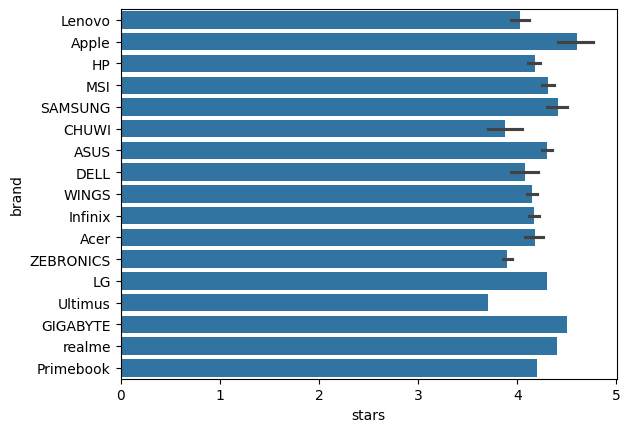

In [340]:
sns.barplot(data=df , y='brand' , x='stars')

In [460]:
pd.crosstab(df['stars'] , df['brand'])

brand,ASUS,Acer,Apple,CHUWI,DELL,GIGABYTE,HP,Infinix,LG,Lenovo,MSI,Primebook,SAMSUNG,Ultimus,WINGS,ZEBRONICS,realme
stars,,,,,,,,,,,,,,,,,
2.3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2.8,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
2.9,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
3.3,1,1,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0
3.4,1,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0
3.5,0,0,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0
3.6,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3.7,1,2,0,4,1,0,0,0,0,4,0,0,0,2,0,0,0


# which laptops has maximum buyers?

<Axes: xlabel='brand'>

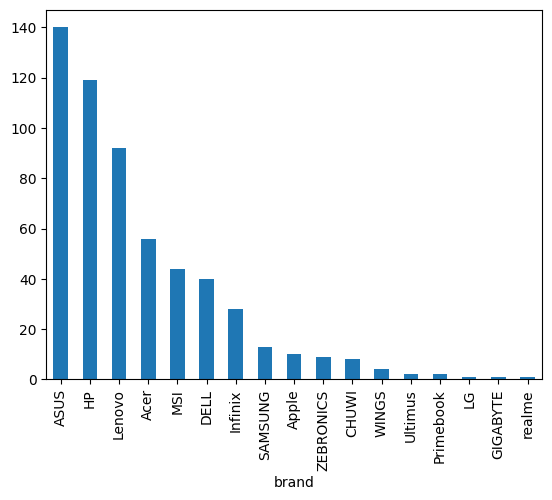

In [342]:
df['brand'].value_counts().plot(kind='bar')

# which brand used  which processor ?

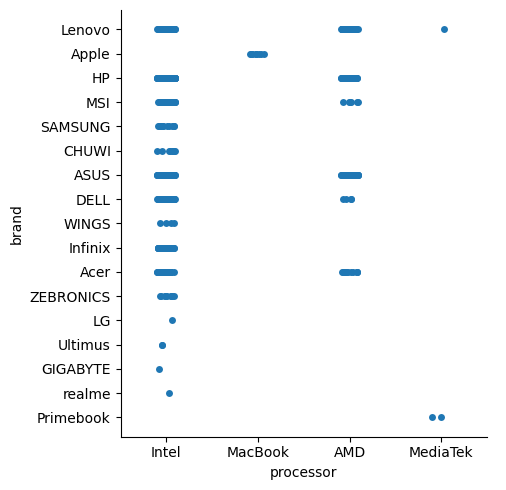

In [353]:
sns.catplot(data=df , y='brand' , x='processor' )

# which brand is expensive?

<Axes: xlabel='price', ylabel='brand'>

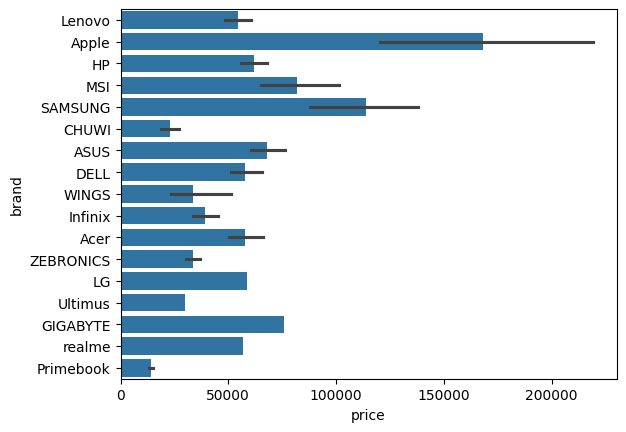

In [355]:
sns.barplot(data=df , y='brand' , x='price' )

# maximum ram and rom of each brand?



<Axes: xlabel='ram', ylabel='brand'>

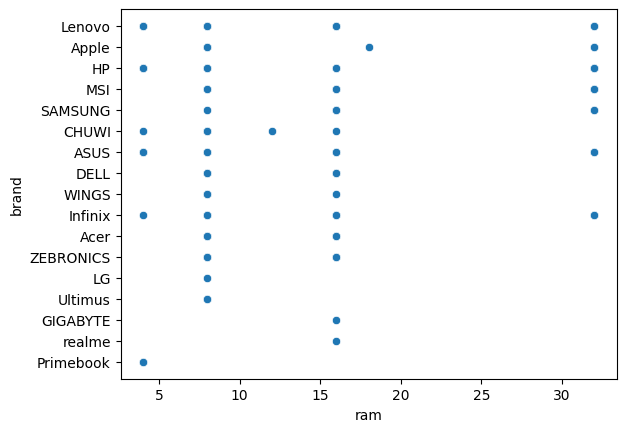

In [358]:
sns.scatterplot(data=df , x='ram' , y='brand')

In [459]:
pd.crosstab(df['ram'] , df['brand'])

brand,ASUS,Acer,Apple,CHUWI,DELL,GIGABYTE,HP,Infinix,LG,Lenovo,MSI,Primebook,SAMSUNG,Ultimus,WINGS,ZEBRONICS,realme
ram,,,,,,,,,,,,,,,,,
4,8,0,0,1,0,0,5,1,0,11,0,2,0,0,0,0,0
8,54,32,7,5,25,0,61,10,1,45,13,0,1,2,3,4,0
12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16,75,24,0,1,15,1,48,14,0,34,28,0,10,0,1,5,1
18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,3,0,2,0,0,0,5,3,0,2,3,0,2,0,0,0,0


<Axes: xlabel='rom', ylabel='brand'>

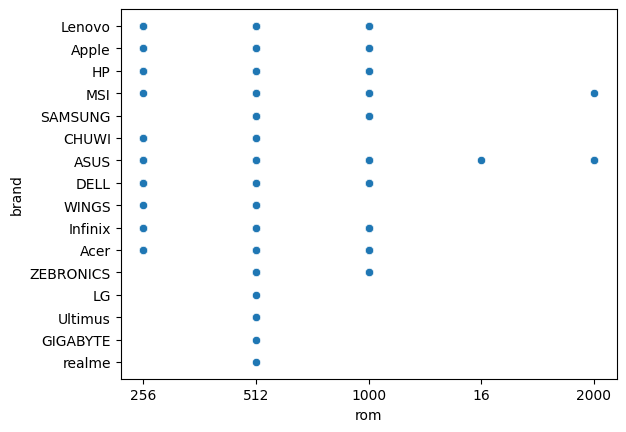

In [359]:
sns.scatterplot(data=df , x='rom' , y='brand')

In [456]:
# total of rom and brand
pd.crosstab(df['rom'] , df['brand'])

brand,ASUS,Acer,Apple,CHUWI,DELL,GIGABYTE,HP,Infinix,LG,Lenovo,MSI,SAMSUNG,Ultimus,WINGS,ZEBRONICS,realme
rom,,,,,,,,,,,,,,,,
1000,24,10,2,0,7,0,19,5,0,9,18,4,0,0,2,0
16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
256,8,6,3,4,4,0,6,3,0,12,1,0,0,1,0,0
512,100,40,5,3,29,1,93,19,1,64,24,9,2,3,7,1


# maximum ram and rom of each brand

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 45.0% of the points cannot be plac

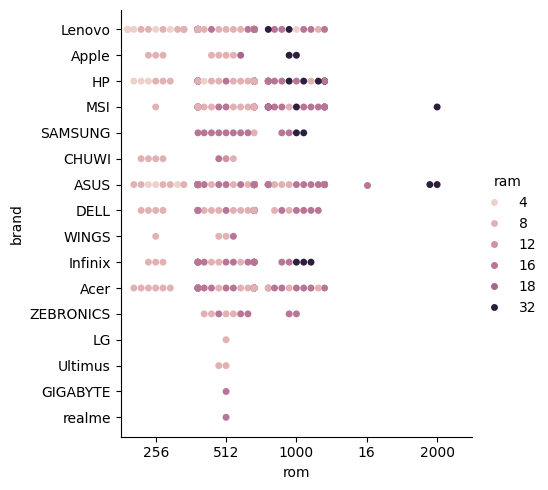

In [377]:
sns.catplot(
    data=df, x="rom", y="brand", hue="ram",
    kind="swarm",
)
plt.show()

# which brand use most of the diffrent processor and os?

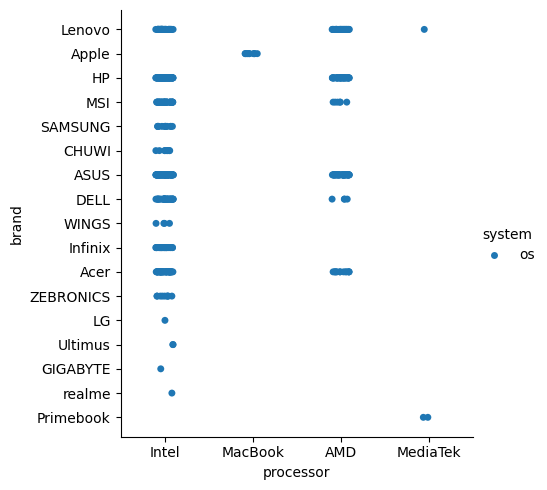

In [379]:
sns.catplot(data=df , x='processor' , y='brand' ,hue='system' )

In [458]:
pd.crosstab(df['processor'] , df['brand'])

brand,ASUS,Acer,Apple,CHUWI,DELL,GIGABYTE,HP,Infinix,LG,Lenovo,MSI,Primebook,SAMSUNG,Ultimus,WINGS,ZEBRONICS,realme
processor,,,,,,,,,,,,,,,,,
AMD,46,13,0,0,4,0,39,0,0,34,6,0,0,0,0,0,0
Intel,94,43,0,8,36,1,80,28,1,57,38,0,13,2,4,9,1
MacBook,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MediaTek,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0


# brand with display

<Axes: xlabel='display', ylabel='brand'>

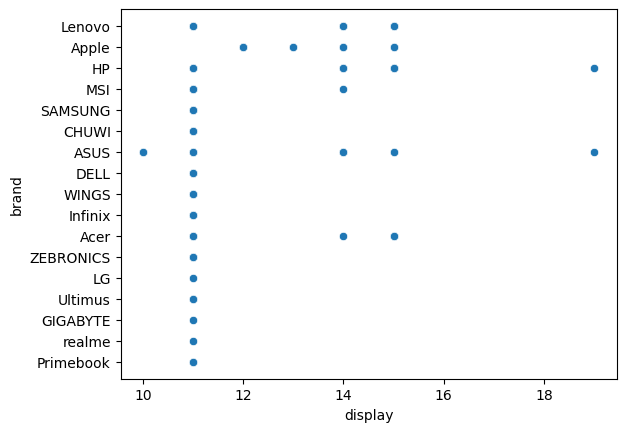

In [393]:
sns.scatterplot(data=df , x='display' , y='brand')

In [454]:
# total of display and brand
pd.crosstab(df['display'] , df['brand'])

brand,ASUS,Acer,Apple,CHUWI,DELL,GIGABYTE,HP,Infinix,LG,Lenovo,MSI,Primebook,SAMSUNG,Ultimus,WINGS,ZEBRONICS,realme
display,,,,,,,,,,,,,,,,,
10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,131,52,0,8,40,1,109,28,1,78,43,2,13,2,4,9,1
12,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,4,1,2,0,0,0,3,0,0,8,1,0,0,0,0,0,0
15,2,3,2,0,0,0,6,0,0,6,0,0,0,0,0,0,0
19,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# which brand giving maximum display with maximum rom

<Figure size 1500x1000 with 0 Axes>

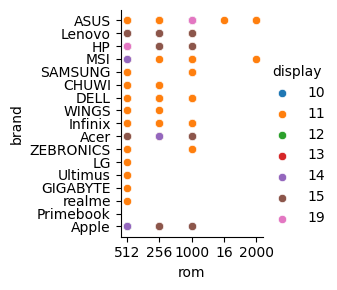

In [401]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df,  hue="display")
g.map(sns.scatterplot, "rom", "brand")
g.add_legend()
plt.show()

In [453]:
# total of rom and brand
pd.crosstab(df['rom'] , df['brand'])

brand,ASUS,Acer,Apple,CHUWI,DELL,GIGABYTE,HP,Infinix,LG,Lenovo,MSI,SAMSUNG,Ultimus,WINGS,ZEBRONICS,realme
rom,,,,,,,,,,,,,,,,
1000,24,10,2,0,7,0,19,5,0,9,18,4,0,0,2,0
16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2000,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
256,8,6,3,4,4,0,6,3,0,12,1,0,0,1,0,0
512,100,40,5,3,29,1,93,19,1,64,24,9,2,3,7,1


# brand and their core

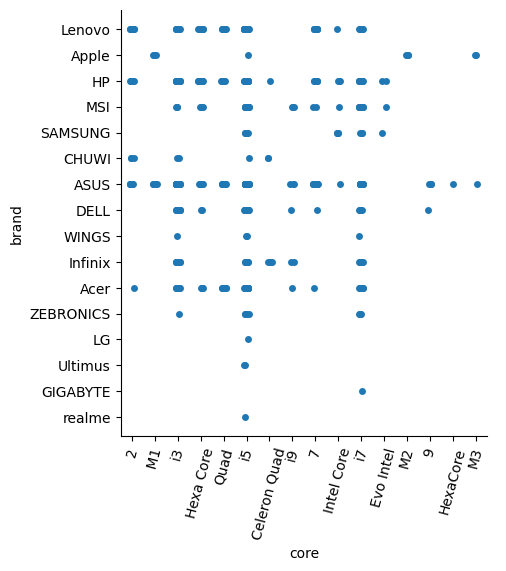

In [422]:
sns.catplot(data=df , x='core' , y='brand')
plt.xticks(rotation=75)
plt.show()

In [457]:
# total of  brand and their cores
pd.crosstab(df['core'] , df['brand'])

brand,ASUS,Acer,Apple,CHUWI,DELL,GIGABYTE,HP,Infinix,LG,Lenovo,MSI,SAMSUNG,Ultimus,WINGS,ZEBRONICS,realme
core,,,,,,,,,,,,,,,,
M1,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11,1,0,3,0,0,10,0,0,14,0,0,0,0,0,0
7,13,1,0,0,1,0,7,0,0,13,2,0,0,0,0,0
9,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Celeron Quad,0,0,0,2,0,0,1,4,0,0,0,0,0,0,0,0
Evo Intel,0,0,0,0,0,0,2,0,0,0,1,1,0,0,0,0
Hexa Core,10,5,0,0,2,0,18,0,0,11,4,0,0,0,0,0
HexaCore,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Intel Core,1,0,0,0,0,0,3,0,0,1,1,4,0,0,0,0


# which brand use which core and their price

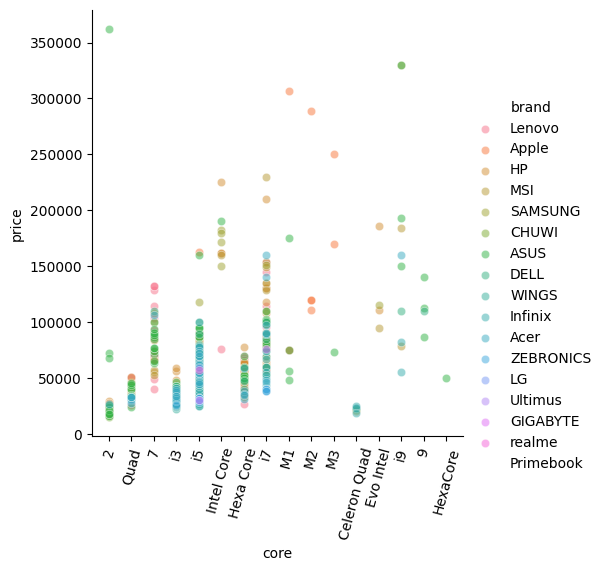

In [432]:
g = sns.FacetGrid(df, hue="brand", height=5)
g.map(sns.scatterplot, "core", "price",alpha=.5 )
plt.xticks(rotation=75)
g.add_legend()

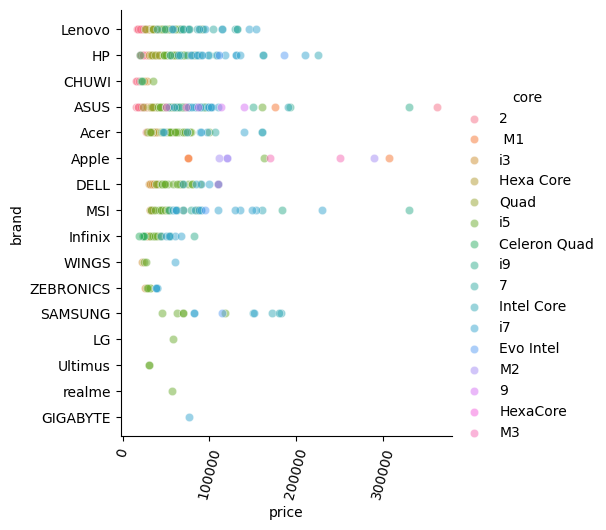

In [431]:
g = sns.FacetGrid(df, hue="core", height=5)
g.map(sns.scatterplot, "price", "brand",alpha=.5 )
plt.xticks(rotation=75)
g.add_legend()

# price of  windows

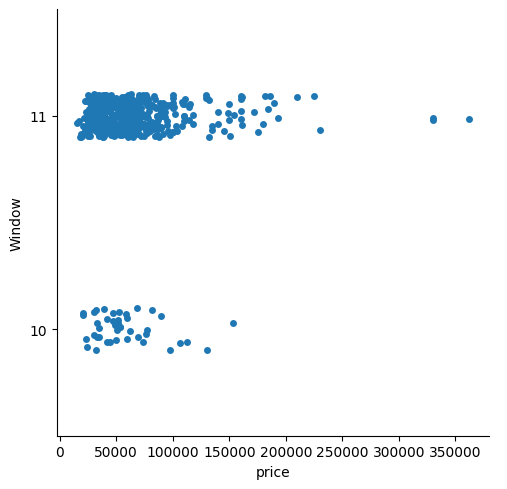

In [437]:
sns.catplot(data=df , x='price' ,y='Window' )

# price of windows of each brand

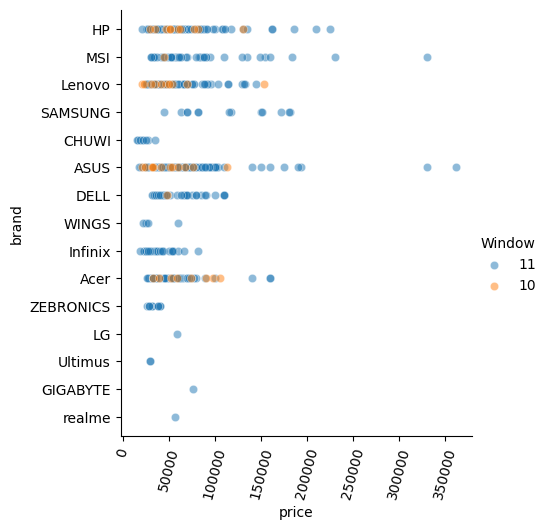

In [438]:
g = sns.FacetGrid(df, hue="Window", height=5)
g.map(sns.scatterplot, "price", "brand",alpha=.5 )
plt.xticks(rotation=75)
g.add_legend()

# each gen with their brand and price

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the catplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:2760: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:2760: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:2760: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:2760: UserWarning: catplot is a figure-level function and does not accept target axes. You may wis

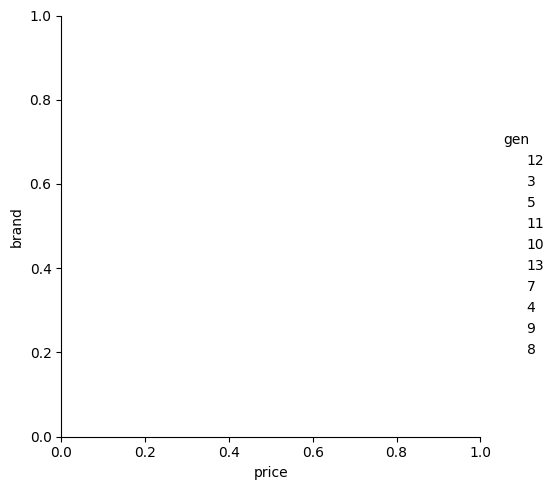

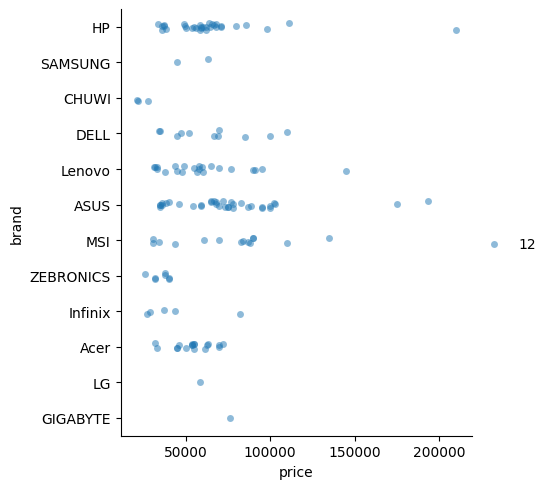

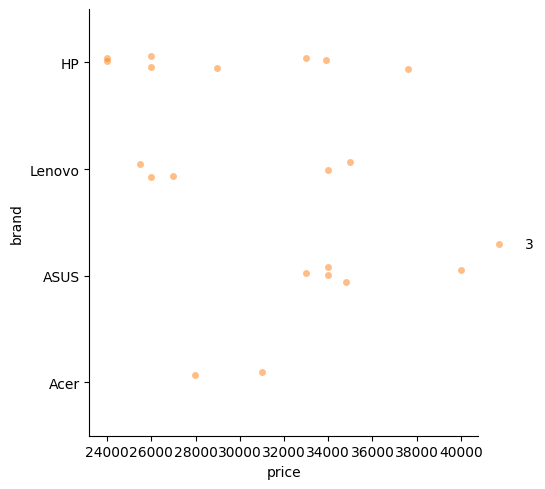

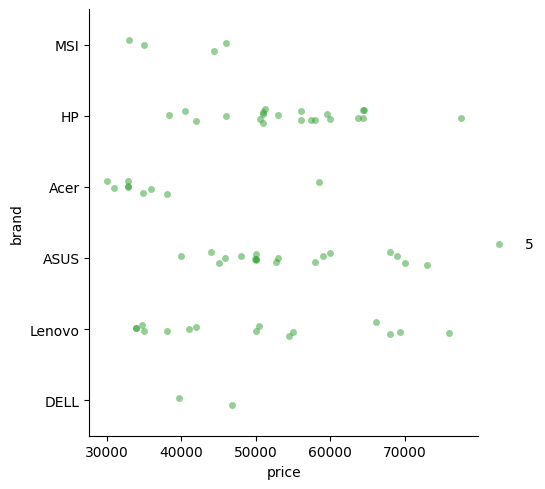

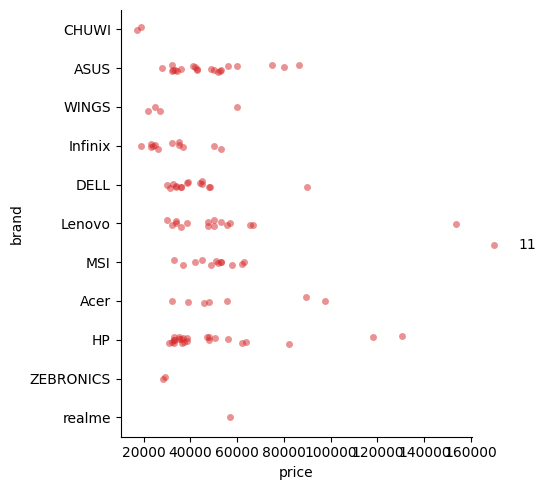

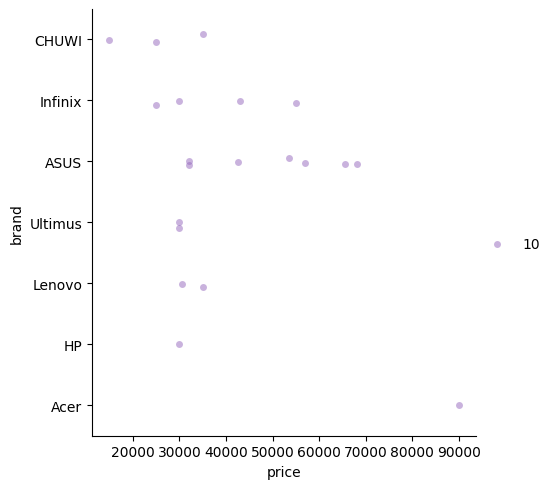

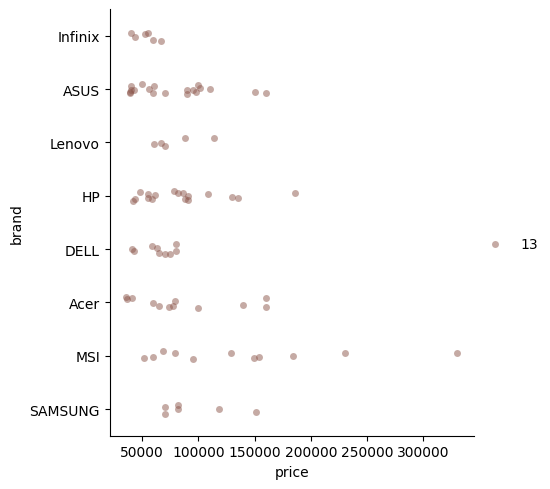

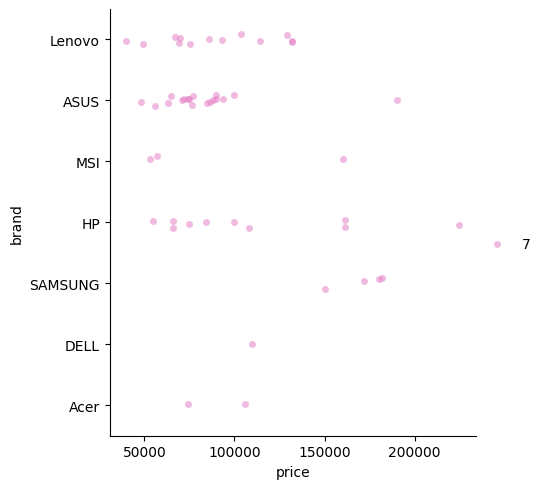

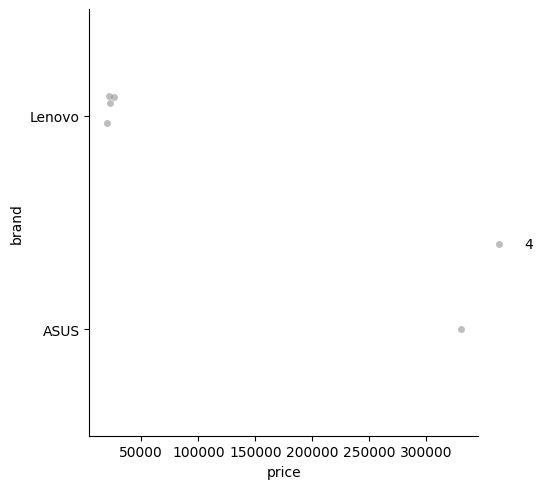

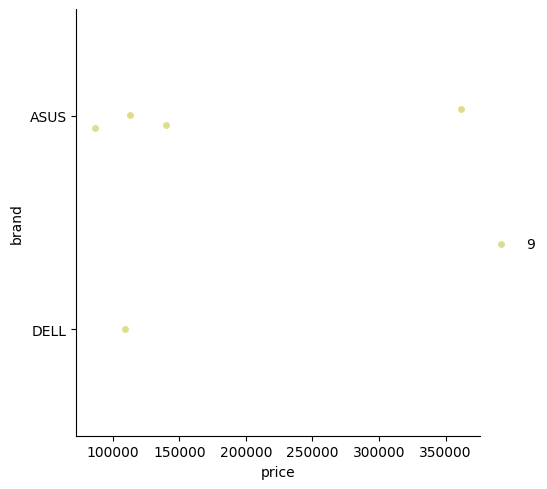

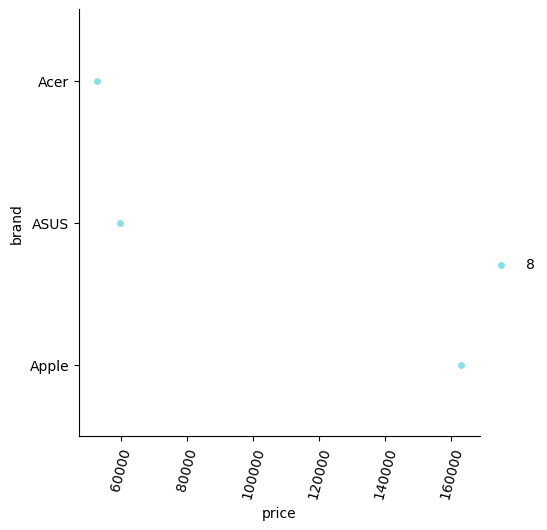

In [446]:
g = sns.FacetGrid(df, hue="gen", height=5)
g.map(sns.catplot, "price", "brand",alpha=.5 )
plt.xticks(rotation=75)
g.add_legend()
plt.xticks(rotation=75)
plt.show()

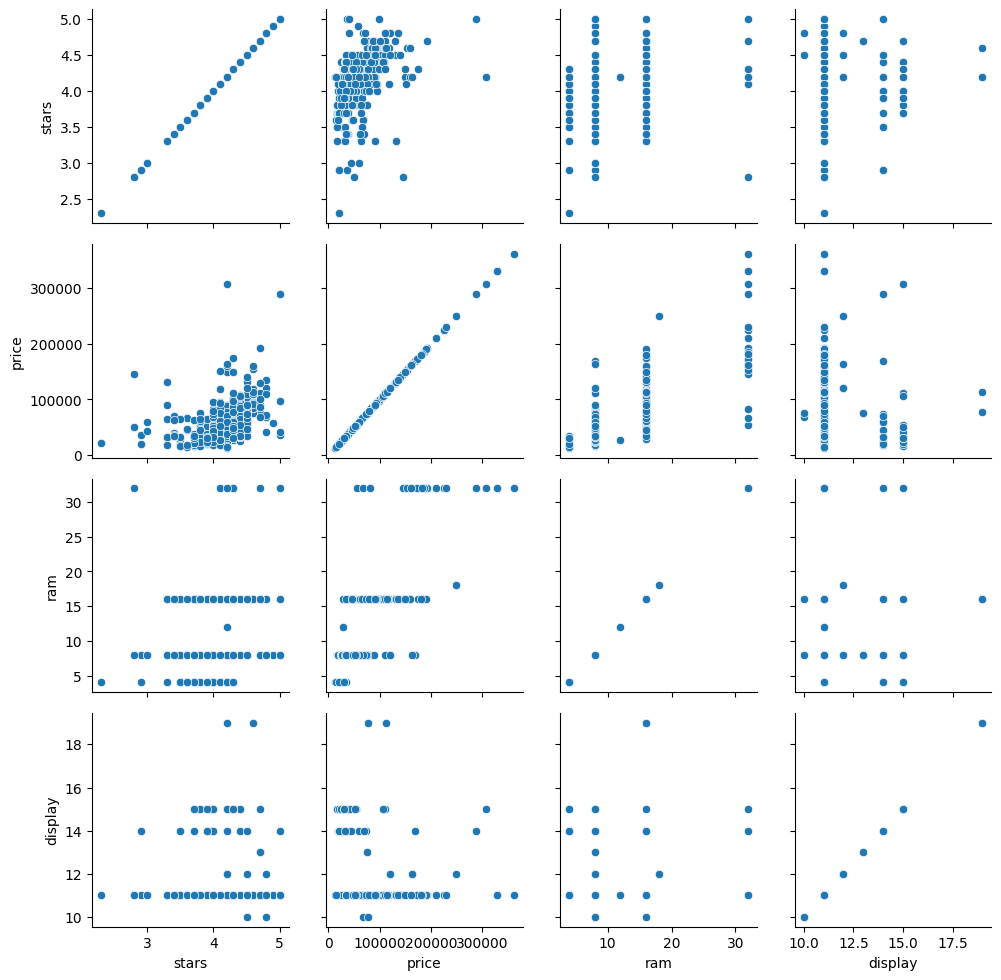

In [451]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)